In [4]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
from matplotlib import pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [9]:
input_path = "/kaggle/input/icr-identify-age-related-conditions/"
work_path = os.getcwd()

In [18]:
df_train_file = pd.read_csv(input_path + 'train.csv')
df_train_file.sample(10)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
39,10b874d01acd,0.119644,3380.98442,85.200147,4.270763,8.138688,2.910182,0.025578,7.619118,1.229900,...,12.203187,1.19712,0.067730,6.762554,386.805524,2520.014490,34.076918,47.440540,0.170500,0
519,d1f14dbe348c,0.209377,4747.80163,85.200147,7.689851,8.138688,4.261179,0.025578,11.463338,1.229900,...,4.447283,0.49706,0.555386,10.408938,103.817168,2806.434945,33.649003,44.338708,0.254571,0
480,c1ffde2da7d9,0.632404,3093.42550,85.200147,90.788555,8.138688,4.695270,0.025578,3.396778,1.229900,...,1.633415,1.16290,0.426699,10.827528,118.061993,6016.454496,41.396125,22.697900,3.564000,0
164,40ffdee110b8,0.350386,3660.04430,98.995203,16.935945,8.138688,5.559023,0.081606,17.538466,3.872428,...,0.476577,0.95526,0.243828,17.776122,72.611063,14712.456380,26.413518,25.774012,7.128000,0
68,19bf6e929506,0.158101,1410.48974,85.200147,7.513322,8.138688,3.384138,0.068208,9.660966,1.229900,...,0.173229,0.49706,0.684073,13.087914,72.611063,14964.464390,25.150239,35.249260,21.978000,0
415,a22a15853970,0.499941,2215.54388,85.200147,73.005581,8.138688,5.519157,0.025578,11.841458,31.682224,...,0.173229,0.49706,0.067730,5.878864,771.058022,823.593582,35.007168,8.783380,21.978000,1
228,5c522f58308c,0.260653,372.04596,85.200147,12.270314,8.138688,6.050697,0.082519,15.093290,1.229900,...,0.652575,1.08982,0.413153,13.906490,72.611063,36279.119480,39.226782,56.738320,1.188000,0
547,df956c379776,0.371751,4517.85686,107.469060,29.978960,8.138688,7.716189,0.025578,22.920374,1.229900,...,0.173229,1.35372,1.171729,17.924954,72.611063,119643.014900,33.362486,50.629820,21.978000,0
201,4e9059199e3d,0.256380,3486.09470,85.200147,29.666163,8.138688,4.571244,0.025578,3.396778,1.229900,...,0.173229,0.49706,1.015950,15.608756,184.939790,4969.603206,32.502935,184.723612,21.978000,0
65,18dd7c934463,0.136736,1122.12496,85.200147,4.617627,8.138688,3.787222,0.152859,8.532908,15.749748,...,0.173229,0.98252,0.142233,9.943838,72.611063,12453.757780,34.605300,45.391942,21.978000,0


In [68]:
description = df_train_file.describe()
description

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.428374,3.533905,0.420420,20.724856,131.714987,14679.595398,31.489716,50.584437,8.522911,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.487547,50.181948,1.303383,9.991907,144.181524,19352.959387,9.864239,36.266251,10.320561,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124414,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.019391,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.339429,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.237329,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [84]:
d = description.transpose()
d['end_jump'] = (d['max'] - d['75%']) / d['75%']
d.nlargest(20,'end_jump')
# Several columns have very few high values

,count,mean,std,min,25%,50%,75%,max,end_jump
Class,617.0,0.175041,0.380310,0.000000,0.000000,0.000000,0.000000,1.000000,inf
FR,617.0,3.533905,50.181948,0.497060,0.497060,1.131000,1.512060,1244.227020,821.868815
FD,617.0,6.930086,64.754262,0.296850,0.296850,1.870155,4.880214,1578.654237,322.480535
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448,287.058091
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851,278.983471
BZ,617.0,550.632525,2076.371275,257.432377,257.432377,257.432377,257.432377,50092.459300,193.584923
BR,617.0,1218.133238,7575.293707,51.216883,424.990642,627.417402,975.649259,179250.252900,182.724070
EH,617.0,0.305107,1.847499,0.003042,0.003042,0.085176,0.237276,42.569748,178.410256
DF,617.0,0.633884,1.912384,0.238680,0.238680,0.238680,0.238680,37.895013,157.769118
DU,617.0,1.799990,9.027674,0.005518,0.005518,0.248292,1.055241,161.355315,151.908497


In [82]:
d.nsmallest(30,'end_jump')

,count,mean,std,min,25%,50%,75%,max,end_jump
EL,617.0,69.771564,38.218722,5.394675,31.709535,70.600959,109.125159,109.125159,0.000000
GL,617.0,8.522911,10.320561,0.001129,0.124414,0.339429,21.978000,21.978000,0.000000
BN,617.0,21.419492,3.478278,9.886800,19.420500,21.186000,23.657700,29.307300,0.238806
CW,617.0,27.165653,14.645993,7.030640,7.030640,36.019104,37.935832,64.521624,0.700810
DN,617.0,26.370568,8.038825,6.339496,20.888264,25.248800,30.544224,62.808096,1.056300
GH,617.0,31.489716,9.864239,9.432735,25.034888,30.608946,36.863947,81.210825,1.202988
DH,617.0,0.367002,0.112989,0.040995,0.295164,0.358023,0.426348,1.060404,1.487179
BQ,617.0,100.752521,97.562909,1.331155,28.923315,64.124680,136.525445,344.644105,1.524395
GI,617.0,50.584437,36.266251,0.897628,23.011684,41.007968,67.931664,191.194764,1.814516
DL,617.0,94.795377,28.243187,10.345600,78.232240,96.264960,110.640680,326.236200,1.948610


In [17]:
df_train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [19]:
df_train_file.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

array([[<Axes: title={'center': 'AB'}>, <Axes: title={'center': 'AF'}>,
        <Axes: title={'center': 'AH'}>, <Axes: title={'center': 'AM'}>,
        <Axes: title={'center': 'AR'}>, <Axes: title={'center': 'AX'}>,
        <Axes: title={'center': 'AY'}>],
       [<Axes: title={'center': 'AZ'}>, <Axes: title={'center': 'BC'}>,
        <Axes: title={'center': 'BD '}>, <Axes: title={'center': 'BN'}>,
        <Axes: title={'center': 'BP'}>, <Axes: title={'center': 'BQ'}>,
        <Axes: title={'center': 'BR'}>],
       [<Axes: title={'center': 'BZ'}>, <Axes: title={'center': 'CB'}>,
        <Axes: title={'center': 'CC'}>, <Axes: title={'center': 'CD '}>,
        <Axes: title={'center': 'CF'}>, <Axes: title={'center': 'CH'}>,
        <Axes: title={'center': 'CL'}>],
       [<Axes: title={'center': 'CR'}>, <Axes: title={'center': 'CS'}>,
        <Axes: title={'center': 'CU'}>, <Axes: title={'center': 'CW '}>,
        <Axes: title={'center': 'DA'}>, <Axes: title={'center': 'DE'}>,
        <A

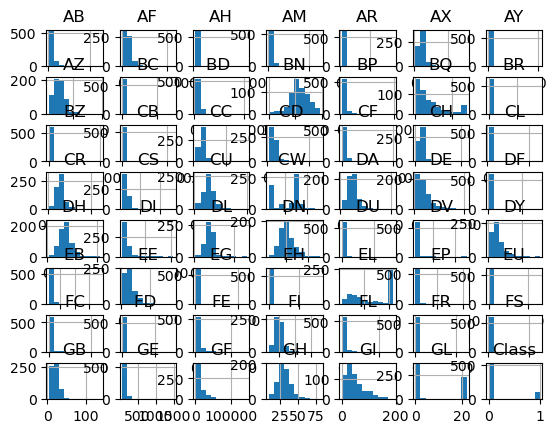

In [20]:
df_train_file.hist()

In [22]:
df_train_file.corr(numeric_only=True)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.350231,0.249246,0.530687,0.157712,0.471912,0.011004,0.158569,0.331736,0.278920,...,0.169934,0.017990,0.036913,0.318741,0.003327,-0.017192,0.148456,0.002903,-0.061601,0.280612
AF,0.350231,1.000000,0.044140,0.183961,0.044917,0.248439,0.039417,0.219172,0.058831,0.045430,...,0.148289,0.021009,-0.003108,0.079993,0.076449,-0.159796,0.187105,0.140935,-0.127870,0.302638
AH,0.249246,0.044140,1.000000,0.128268,0.749794,0.039324,0.055385,0.095627,0.366910,0.209508,...,-0.022822,-0.009112,0.018328,0.159666,0.011332,-0.029422,-0.037542,-0.073142,0.029175,0.044645
AM,0.530687,0.183961,0.128268,1.000000,0.175212,0.225382,0.081666,0.131885,0.329658,0.277908,...,0.187974,-0.009183,0.040846,0.217443,-0.012176,-0.019639,0.089008,0.100873,-0.079717,0.239170
AR,0.157712,0.044917,0.749794,0.175212,1.000000,0.011715,0.099947,0.099282,0.073730,-0.002509,...,0.080164,-0.007933,0.068271,0.002816,0.034682,0.027927,-0.120285,0.074428,0.028150,0.064380
AX,0.471912,0.248439,0.039324,0.225382,0.011715,1.000000,0.016315,0.269728,0.079799,0.124581,...,0.020747,-0.014095,0.045893,0.233188,0.099148,0.075500,0.119736,0.046596,-0.004384,0.097616
AY,0.011004,0.039417,0.055385,0.081666,0.099947,0.016315,1.000000,0.036790,0.132495,0.506917,...,-0.027435,-0.002789,-0.010552,0.025665,0.002803,-0.006869,0.196392,0.022473,0.067403,0.082420
AZ,0.158569,0.219172,0.095627,0.131885,0.099282,0.269728,0.036790,1.000000,0.036424,0.135976,...,-0.050647,-0.010384,0.020465,0.223358,0.016947,0.218551,0.111962,0.067379,0.112823,0.013516
BC,0.331736,0.058831,0.366910,0.329658,0.073730,0.079799,0.132495,0.036424,1.000000,0.753051,...,-0.018865,0.034514,0.018158,0.419790,0.052096,-0.043482,0.128950,-0.020755,0.041742,0.155882
BD,0.278920,0.045430,0.209508,0.277908,-0.002509,0.124581,0.506917,0.135976,0.753051,1.000000,...,-0.008830,-0.010248,0.021651,0.439534,-0.003691,0.005017,0.212123,-0.009943,0.020937,0.112184


array([[<Axes: xlabel='AB', ylabel='AB'>,
        <Axes: xlabel='AF', ylabel='AB'>,
        <Axes: xlabel='AH', ylabel='AB'>, ...,
        <Axes: xlabel='GI', ylabel='AB'>,
        <Axes: xlabel='GL', ylabel='AB'>,
        <Axes: xlabel='Class', ylabel='AB'>],
       [<Axes: xlabel='AB', ylabel='AF'>,
        <Axes: xlabel='AF', ylabel='AF'>,
        <Axes: xlabel='AH', ylabel='AF'>, ...,
        <Axes: xlabel='GI', ylabel='AF'>,
        <Axes: xlabel='GL', ylabel='AF'>,
        <Axes: xlabel='Class', ylabel='AF'>],
       [<Axes: xlabel='AB', ylabel='AH'>,
        <Axes: xlabel='AF', ylabel='AH'>,
        <Axes: xlabel='AH', ylabel='AH'>, ...,
        <Axes: xlabel='GI', ylabel='AH'>,
        <Axes: xlabel='GL', ylabel='AH'>,
        <Axes: xlabel='Class', ylabel='AH'>],
       ...,
       [<Axes: xlabel='AB', ylabel='GI'>,
        <Axes: xlabel='AF', ylabel='GI'>,
        <Axes: xlabel='AH', ylabel='GI'>, ...,
        <Axes: xlabel='GI', ylabel='GI'>,
        <Axes: xlabel='GL', ylab

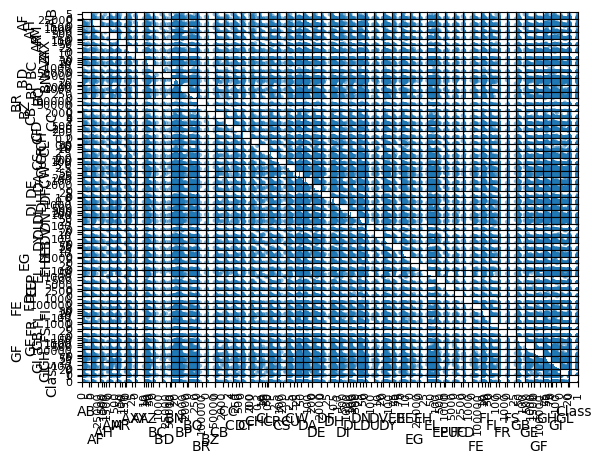

In [24]:
pd.plotting.scatter_matrix(df_train_file) # unreadable: too many columns

In [29]:
df_train_file = df_train_file.fillna(method="ffill")

In [85]:
df_train_file['EJ'].value_counts() # EJ is categorical


B    395
A    222
Name: EJ, dtype: int64

In [91]:
df_train_file['EJ_dummy'] = (df_train_file['EJ'] == 'B')
df_train_file['EJ_dummy'] = df_train_file['EJ_dummy'].astype('float64')
df_train_file['EJ_dummy'].sample(10)

607    0.0
334    1.0
336    1.0
78     1.0
61     1.0
438    0.0
5      0.0
537    1.0
367    1.0
255    1.0
Name: EJ_dummy, dtype: float64

In [92]:
df_train_x = df_train_file.loc[:, (df_train_file.columns != 'Class') & (df_train_file.columns != 'Id') & (df_train_file.columns != 'EJ')]
df_train_y = df_train_file['Class']
df_train_x

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ_dummy
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,1.0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,1.0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0.0
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,1.0
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0.0
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,1.0


In [93]:
clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
clf.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)

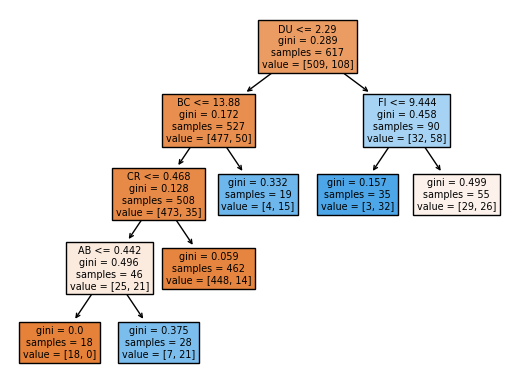

In [94]:
tree.plot_tree(clf, feature_names=df_train_x.columns, filled=True)
plt.show()

* EJ is categorical everything else numerical
* Most predictive columns are DU, BC, CR
* Several columns have very few high values, given the small dataset those values have outstanding importance
